In [425]:
from matplotlib import pyplot as plt
import time

In [426]:
shot_xgs = [0.3726278, 0.027297948, 0.018977597, 0.06415172, 0.059422635, 0.0990071, 0.52322966, 0.7835, 0.098152086, 0.022023825, 0.037379242, 0.08841159, 0.00889191, 0.06329633, 0.4909198, 0.09585352, 0.044309825, 0.17010798, 0.6200685, 0.24049442, 0.018424189, 0.23760203, 0.29399577, 0.07116065, 0.736906]
N = 100

In [427]:
execution_times_dp = []
results = []
for i in range(N):
    start = time.process_time_ns()
    n = len(shot_xgs)
    p_k = [1] + [0]*n
    # Iterate over the dp table
    for i in range(n+1):
        for c in range(i, 0, -1):
            inc = shot_xgs[i-1]*p_k[c-1]
            p_k[c-1] -= inc
            p_k[c] += inc
    res = p_k
    end = time.process_time_ns()
    results.append(res)
    execution_times_dp.append(end - start)
assert all([results[0] == res for res in results]), 'Results are not consistent' 

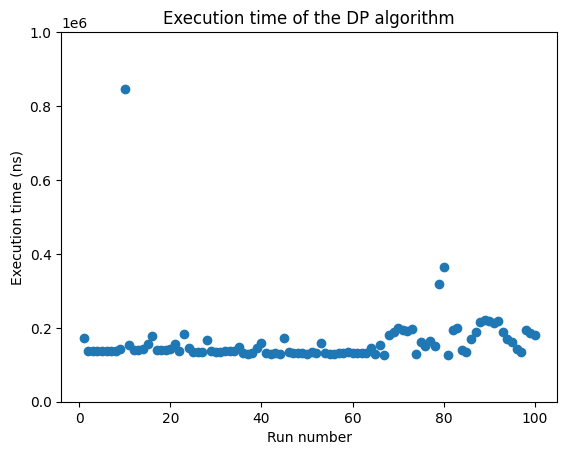

In [428]:
plt.scatter(range(1, N+1), execution_times_dp)
plt.title('Execution time of the DP algorithm')
plt.ylim(0, 1000000)
plt.xlabel('Run number')
plt.ylabel('Execution time (ns)')
plt.show()

In [429]:
from poibin.poibin import PoiBin
execution_times_fft = []
results = []
for i in range(N):
    start = time.process_time_ns()
    res = PoiBin(shot_xgs).get_pmf_xi()
    end = time.process_time_ns()
    results.append(list(res))
    execution_times_fft.append(end - start)
assert all([results[0] == res for res in results]), 'Results are not consistent' 

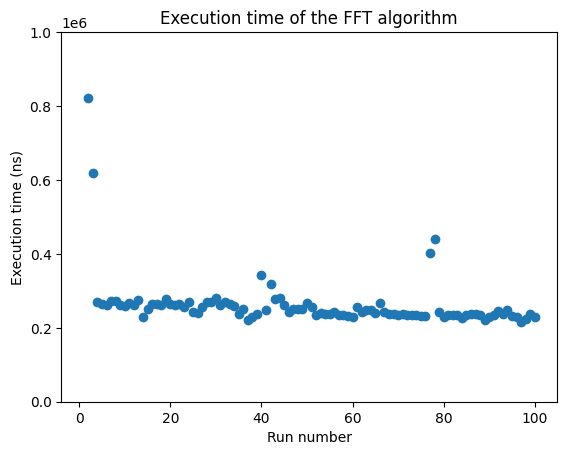

In [430]:
plt.scatter(range(1, N+1), execution_times_fft)
plt.title('Execution time of the FFT algorithm')
plt.ylim(0, 1000000)
plt.xlabel('Run number')
plt.ylabel('Execution time (ns)')
plt.show()

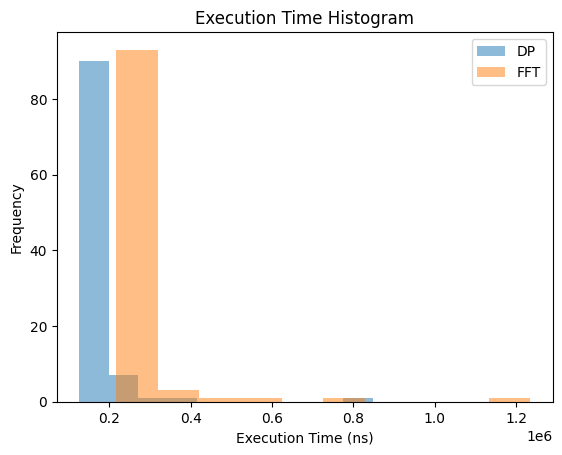

mean_dp=162874.3
mean_fft=272066.47

std_dev_dp=77982.47778616681
std_dev_fft=121732.27151708418


In [431]:
import numpy as np
from pprint import pprint
# Plot histogram
plt.hist(execution_times_dp, bins=10, alpha=0.5, label='DP')
plt.hist(execution_times_fft, bins=10, alpha=0.5, label='FFT')
plt.legend()
plt.title('Execution Time Histogram')
plt.xlabel('Execution Time (ns)')
plt.ylabel('Frequency')
plt.show()

# Calculate mean
mean_dp = np.mean(execution_times_dp)
mean_fft = np.mean(execution_times_fft)

# Calculate standard deviation
std_dev_dp = np.std(execution_times_dp)
std_dev_fft = np.std(execution_times_fft)

# Pretty print the variables
print(f'{mean_dp=}')
print(f'{mean_fft=}')
print()
print(f'{std_dev_dp=}')
print(f'{std_dev_fft=}')
